In [2]:
# imports
import pandas as pd

In [3]:
# create df
df = pd.read_csv("smu-mh-plainsville.csv")

# rename columns
renamedColumns = {
    "Timestamp": "timestamp",
    "1. What is your age?": "age",
    "2. Gender": "gender",
    "3. Relationship Status": "relationship_status",
    "4. Occupation Status": "occupation_status",
    "5. What type of organizations are you affiliated with?": "affiliated_organizations",
    "6. Do you use social media?": "use_social_media",
    "7. What social media platforms do you commonly use?": "common_social_media_platforms",
    "8. What is the average time you spend on social media every day?": "average_time_on_social_media",
    "9. How often do you find yourself using Social media without a specific purpose?": "social_media_usage_without_purpose",
    "10. How often do you get distracted by Social media when you are busy doing something?": "social_media_distraction_frequency",
    "11. Do you feel restless if you haven't used Social media in a while?": "restlessness_due_to_social_media",
    "12. On a scale of 1 to 5, how easily distracted are you?": "distractibility_scale",
    "13. On a scale of 1 to 5, how much are you bothered by worries?": "worry_bother_scale",
    "14. Do you find it difficult to concentrate on things?": "difficulty_concentrating",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?": "social_media_comparison_frequency",
    "16. Following the previous question, how do you feel about these comparisons, generally speaking?": "feelings_about_social_media_comparisons",
    "17. How often do you look to seek validation from features of social media?": "social_media_validation_seek_frequency",
    "18. How often do you feel depressed or down?": "frequency_of_depression",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?": "interest_fluctuation_scale",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?": "sleep_issues_scale",
}
df.rename(columns=renamedColumns, inplace=True)

# fix column datatypes
df['age'] = df['age'].astype(int)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# rename average time on social media values
time_interval_mapping = {
    'Between 2 and 3 hours': '2-3 hours',
    'More than 5 hours': '5+ hours',
    'Between 3 and 4 hours': '3-4 hours',
    'Less than an Hour': '< 1 hour',
    'Between 1 and 2 hours': '1-2 hours',
    'Between 4 and 5 hours': '4-5 hours',
}
df['average_time_on_social_media'] = df['average_time_on_social_media'].map(time_interval_mapping)

# clean gender column
for row in df.itertuples():
    index = row.Index
    value = row.gender.strip()
    if value in ["Nonbinary", "NB", "Non binary"]:
        df.at[index, "gender"] = "Non-binary"
    elif value == "Trans":
        df.at[index, "gender"] = "Transgender"
    elif value in ["unsure", "There are others???"]:
         df.at[index, "gender"] = None

# blow it up
df = df.assign(common_social_media_platforms=df['common_social_media_platforms'].str.split(', ')).explode('common_social_media_platforms')
df = df.assign(affiliated_organizations=df['affiliated_organizations'].str.split(', ')).explode('affiliated_organizations')

# clean organizations column
for row in df.itertuples():
    index = row.Index
    value = row.affiliated_organizations
    if value == "N/A":
        df.at[index, "affiliated_organizations"] = None

In [4]:
df["average_time_on_social_media"].unique()

array(['2-3 hours', '5+ hours', '3-4 hours', '< 1 hour', '1-2 hours',
       '4-5 hours'], dtype=object)

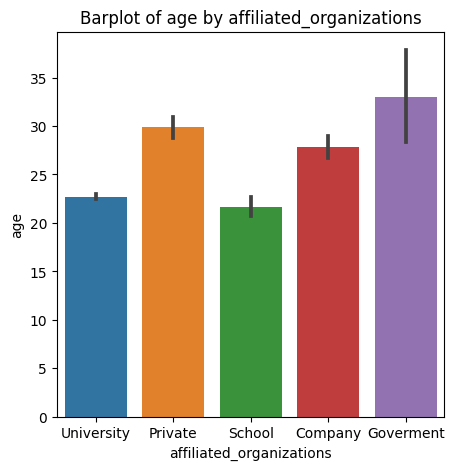

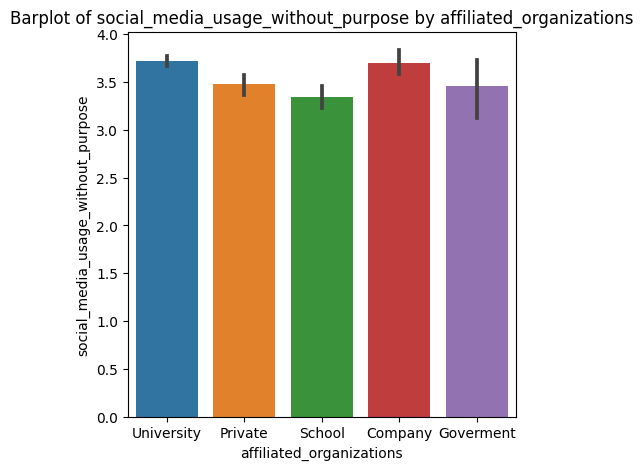

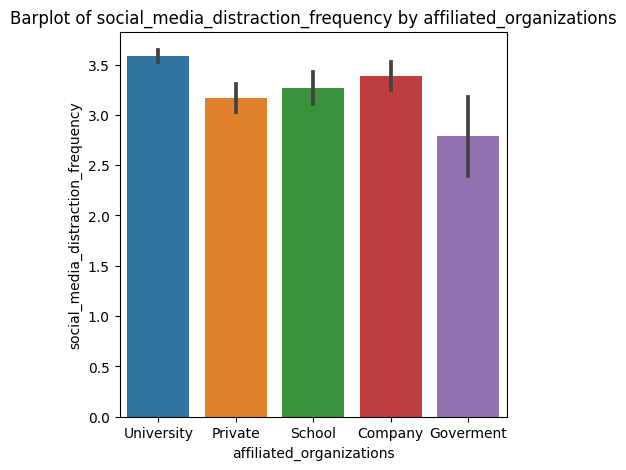

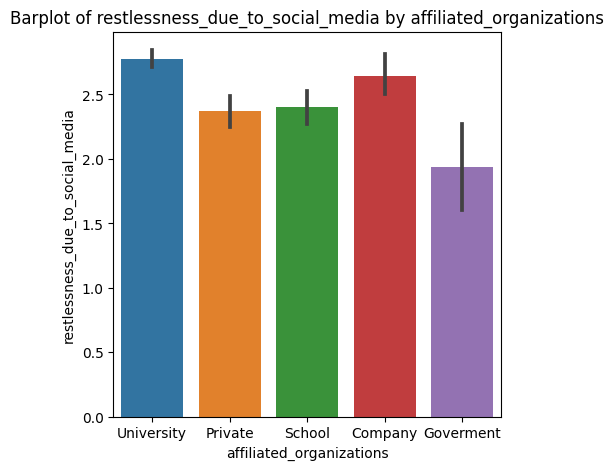

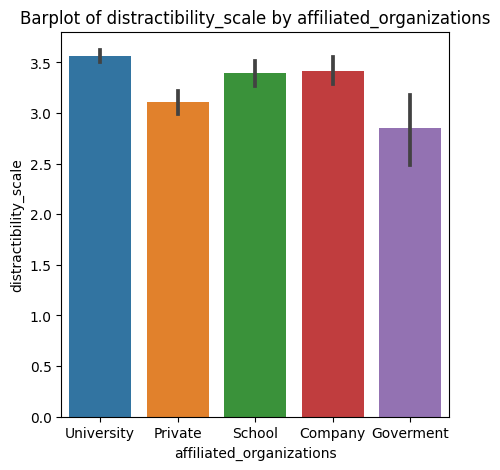

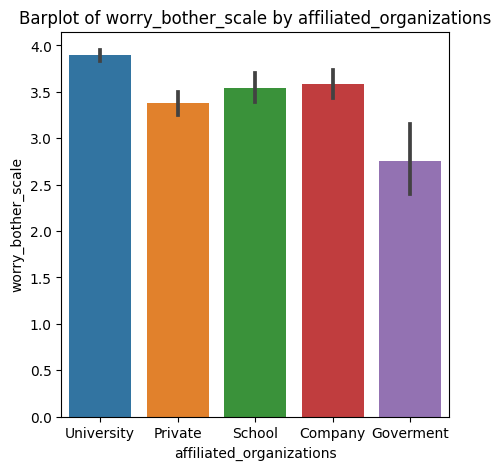

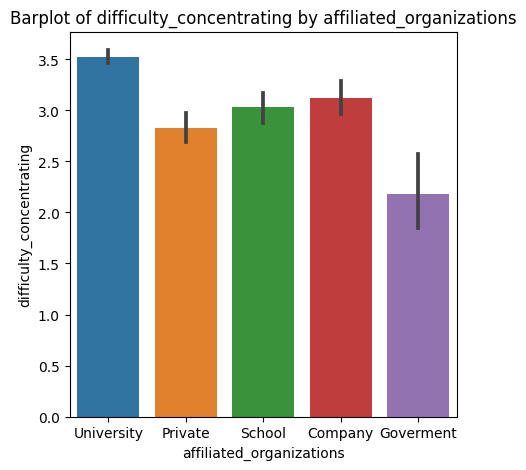

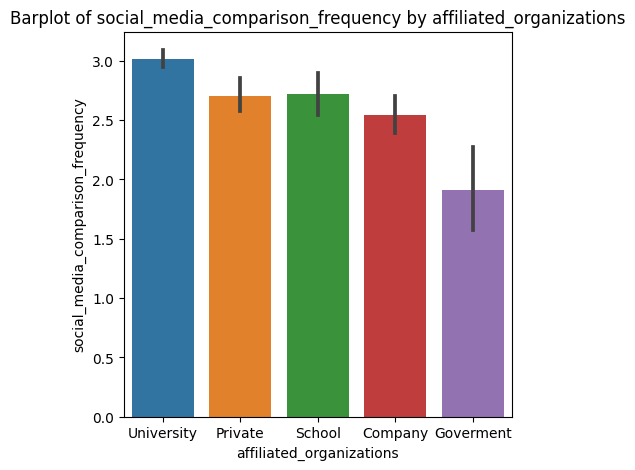

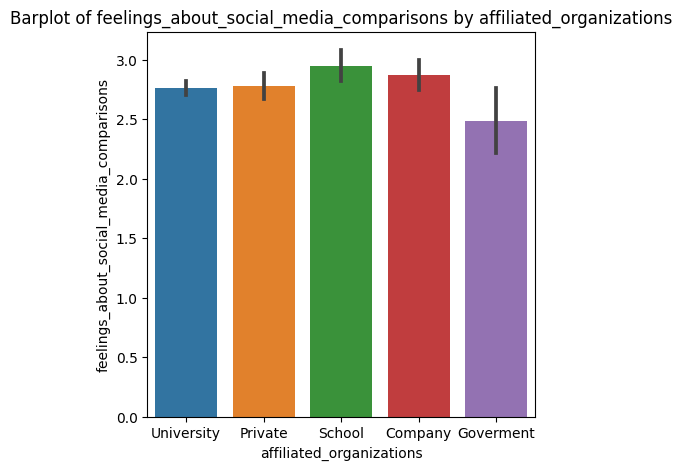

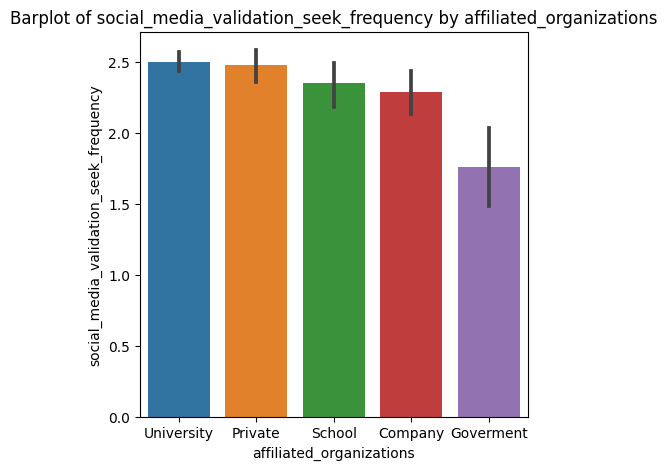

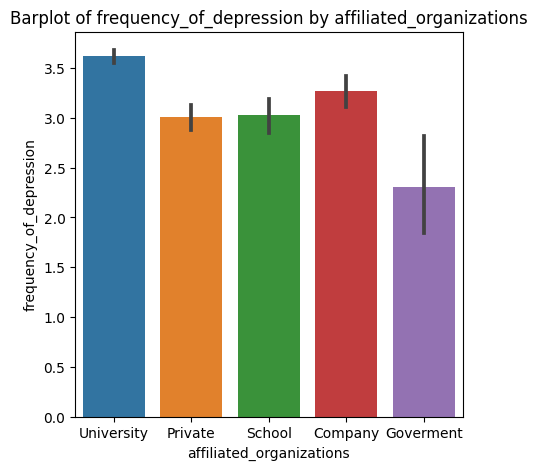

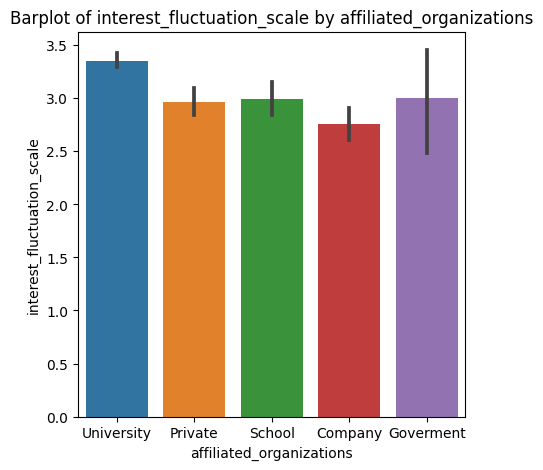

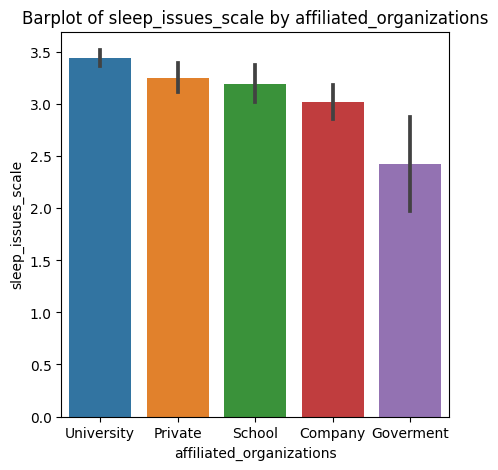

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

column = "affiliated_organizations"

# iterate through columns and create barplots
for numeric_column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(5, 5))
    sns.barplot(x=column, y=numeric_column, data=df
                # , order=['< 1 hour', '1-2 hours', '2-3 hours', '3-4 hours', '4-5 hours', '5+ hours']
                )
    plt.title(f'Barplot of {numeric_column} by {column}')
    plt.show()